# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

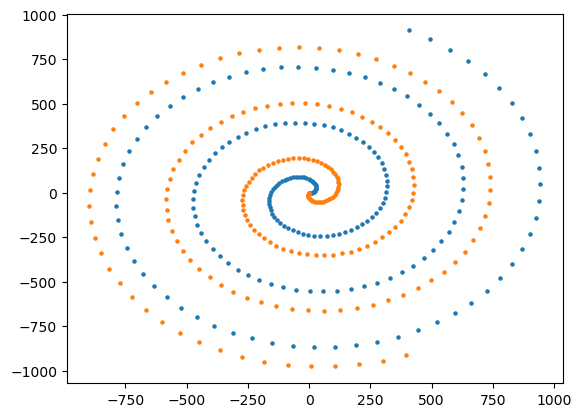

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

/var/folders/2_/q_g7srzn2s57nl8hrh16f1d00000gn/T/ipykernel_12870/2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [17]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import regularizers

X = df.drop(columns=["CLASS"])
y = df["CLASS"]

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.5)


# Build model

model = Sequential([ 
    Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0),
                                bias_regularizer=regularizers.L2(0),
                                activity_regularizer=regularizers.L2(0)
         ), 
    Dense(6, activation='relu', kernel_regularizer=regularizers.L2(0),
                                bias_regularizer=regularizers.L2(0),
                                activity_regularizer=regularizers.L2(0)
         ),
    Dense(4, activation='relu', kernel_regularizer=regularizers.L2(0),
                                bias_regularizer=regularizers.L2(0),
                                activity_regularizer=regularizers.L2(0)
         ),
    Dense(2, activation='relu', kernel_regularizer=regularizers.L2(0),
                                bias_regularizer=regularizers.L2(0),
                                activity_regularizer=regularizers.L2(0)
         ),
    Dense(2, activation='softmax', kernel_regularizer=regularizers.L2(0),
                                bias_regularizer=regularizers.L2(0),
                                activity_regularizer=regularizers.L2(0))
    ])

# Compile the model

optimizer = Adam(lr=0.03)
model.compile(
    optimizer=optimizer, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=1500,
)

#Evaluate the model
model.evaluate(
    X_test,
    y_test
)

# I tried but I could not replicate the playground results



Epoch 1/1500


/Users/tiagorebelo/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 770us/step - loss: 0.6966 - accuracy: 0.5150
Epoch 2/1500
20/20 [==============================] - 0s 678us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 3/1500
20/20 [==============================] - 0s 714us/step - loss: 0.6946 - accuracy: 0.4750
Epoch 4/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4750
Epoch 5/1500
20/20 [==============================] - 0s 663us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 6/1500
20/20 [==============================] - 0s 675us/step - loss: 0.6928 - accuracy: 0.5250
Epoch 7/1500
20/20 [==============================] - 0s 672us/step - loss: 0.6948 - accuracy: 0.5250
Epoch 8/1500
20/20 [==============================] - 0s 673us/step - loss: 0.6926 - accuracy: 0.5250
Epoch 9/1500
20/20 [==============================] - 0s 675us/step - loss: 0.6941 - accuracy: 0.4850
Epoch 10/1500
20/20 [==============================] - 0s 690us/step - loss: 0.6953 - accuracy: 0

20/20 [==============================] - 0s 654us/step - loss: 0.6950 - accuracy: 0.5250
Epoch 81/1500
20/20 [==============================] - 0s 657us/step - loss: 0.6983 - accuracy: 0.4650
Epoch 82/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5250
Epoch 83/1500
20/20 [==============================] - 0s 677us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 84/1500
20/20 [==============================] - 0s 623us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 85/1500
20/20 [==============================] - 0s 620us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 86/1500
20/20 [==============================] - 0s 618us/step - loss: 0.6959 - accuracy: 0.4850
Epoch 87/1500
20/20 [==============================] - 0s 619us/step - loss: 0.6926 - accuracy: 0.5250
Epoch 88/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6960 - accuracy: 0.5250
Epoch 89/1500
20/20 [==============================] - 0s 629us/step - loss: 0.6929 - acc

20/20 [==============================] - 0s 657us/step - loss: 0.6948 - accuracy: 0.5250
Epoch 160/1500
20/20 [==============================] - 0s 630us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 161/1500
20/20 [==============================] - 0s 648us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 162/1500
20/20 [==============================] - 0s 661us/step - loss: 0.6941 - accuracy: 0.4850
Epoch 163/1500
20/20 [==============================] - 0s 685us/step - loss: 0.6955 - accuracy: 0.5250
Epoch 164/1500
20/20 [==============================] - 0s 628us/step - loss: 0.6947 - accuracy: 0.5250
Epoch 165/1500
20/20 [==============================] - 0s 637us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 166/1500
20/20 [==============================] - 0s 640us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 167/1500
20/20 [==============================] - 0s 673us/step - loss: 0.6974 - accuracy: 0.5250
Epoch 168/1500
20/20 [==============================] - 0s 636us/step - loss: 0

Epoch 238/1500
20/20 [==============================] - 0s 664us/step - loss: 0.6961 - accuracy: 0.5250
Epoch 239/1500
20/20 [==============================] - 0s 656us/step - loss: 0.6956 - accuracy: 0.4550
Epoch 240/1500
20/20 [==============================] - 0s 651us/step - loss: 0.6930 - accuracy: 0.5450
Epoch 241/1500
20/20 [==============================] - 0s 661us/step - loss: 0.6985 - accuracy: 0.5250
Epoch 242/1500
20/20 [==============================] - 0s 652us/step - loss: 0.6927 - accuracy: 0.4850
Epoch 243/1500
20/20 [==============================] - 0s 665us/step - loss: 0.6937 - accuracy: 0.5250
Epoch 244/1500
20/20 [==============================] - 0s 651us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 245/1500
20/20 [==============================] - 0s 655us/step - loss: 0.6961 - accuracy: 0.4350
Epoch 246/1500
20/20 [==============================] - 0s 636us/step - loss: 0.6953 - accuracy: 0.4250
Epoch 247/1500
20/20 [==============================] - 0s 629us

20/20 [==============================] - 0s 723us/step - loss: 0.6940 - accuracy: 0.5250
Epoch 317/1500
20/20 [==============================] - 0s 818us/step - loss: 0.6928 - accuracy: 0.5250
Epoch 318/1500
20/20 [==============================] - 0s 778us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 319/1500
20/20 [==============================] - 0s 775us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 320/1500
20/20 [==============================] - 0s 638us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 321/1500
20/20 [==============================] - 0s 666us/step - loss: 0.6958 - accuracy: 0.5250
Epoch 322/1500
20/20 [==============================] - 0s 640us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 323/1500
20/20 [==============================] - 0s 653us/step - loss: 0.6939 - accuracy: 0.5250
Epoch 324/1500
20/20 [==============================] - 0s 636us/step - loss: 0.6957 - accuracy: 0.5250
Epoch 325/1500
20/20 [==============================] - 0s 670us/step - loss: 0

20/20 [==============================] - 0s 675us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 395/1500
20/20 [==============================] - 0s 660us/step - loss: 0.6937 - accuracy: 0.5250
Epoch 396/1500
20/20 [==============================] - 0s 677us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 397/1500
20/20 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5250
Epoch 398/1500
20/20 [==============================] - 0s 659us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 399/1500
20/20 [==============================] - 0s 661us/step - loss: 0.6926 - accuracy: 0.5250
Epoch 400/1500
20/20 [==============================] - 0s 656us/step - loss: 0.6940 - accuracy: 0.5250
Epoch 401/1500
20/20 [==============================] - 0s 649us/step - loss: 0.6954 - accuracy: 0.5250
Epoch 402/1500
20/20 [==============================] - 0s 820us/step - loss: 0.6949 - accuracy: 0.5250
Epoch 403/1500
20/20 [==============================] - 0s 642us/step - loss: 0.6

Epoch 473/1500
20/20 [==============================] - 0s 661us/step - loss: 0.6928 - accuracy: 0.5250
Epoch 474/1500
20/20 [==============================] - 0s 669us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 475/1500
20/20 [==============================] - 0s 649us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 476/1500
20/20 [==============================] - 0s 633us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 477/1500
20/20 [==============================] - 0s 623us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 478/1500
20/20 [==============================] - 0s 756us/step - loss: 0.6952 - accuracy: 0.5250
Epoch 479/1500
20/20 [==============================] - 0s 662us/step - loss: 0.6939 - accuracy: 0.5250
Epoch 480/1500
20/20 [==============================] - 0s 630us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 481/1500
20/20 [==============================] - 0s 668us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 482/1500
20/20 [==============================] - 0s 658us

20/20 [==============================] - 0s 682us/step - loss: 0.6948 - accuracy: 0.5250
Epoch 552/1500
20/20 [==============================] - 0s 652us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 553/1500
20/20 [==============================] - 0s 648us/step - loss: 0.6951 - accuracy: 0.5250
Epoch 554/1500
20/20 [==============================] - 0s 614us/step - loss: 0.6951 - accuracy: 0.4550
Epoch 555/1500
20/20 [==============================] - 0s 626us/step - loss: 0.6975 - accuracy: 0.5250
Epoch 556/1500
20/20 [==============================] - 0s 640us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 557/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6966 - accuracy: 0.5250
Epoch 558/1500
20/20 [==============================] - 0s 644us/step - loss: 0.6962 - accuracy: 0.4950
Epoch 559/1500
20/20 [==============================] - 0s 642us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 560/1500
20/20 [==============================] - 0s 635us/step - loss: 0

Epoch 630/1500
20/20 [==============================] - 0s 673us/step - loss: 0.6946 - accuracy: 0.5250
Epoch 631/1500
20/20 [==============================] - 0s 647us/step - loss: 0.6957 - accuracy: 0.4550
Epoch 632/1500
20/20 [==============================] - 0s 620us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 633/1500
20/20 [==============================] - 0s 616us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 634/1500
20/20 [==============================] - 0s 617us/step - loss: 0.6924 - accuracy: 0.5250
Epoch 635/1500
20/20 [==============================] - 0s 679us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 636/1500
20/20 [==============================] - 0s 615us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 637/1500
20/20 [==============================] - 0s 642us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 638/1500
20/20 [==============================] - 0s 724us/step - loss: 0.6946 - accuracy: 0.4850
Epoch 639/1500
20/20 [==============================] - 0s 635us

20/20 [==============================] - 0s 673us/step - loss: 0.6924 - accuracy: 0.5250
Epoch 709/1500
20/20 [==============================] - 0s 701us/step - loss: 0.6937 - accuracy: 0.5250
Epoch 710/1500
20/20 [==============================] - 0s 725us/step - loss: 0.6941 - accuracy: 0.5250
Epoch 711/1500
20/20 [==============================] - 0s 691us/step - loss: 0.6958 - accuracy: 0.4350
Epoch 712/1500
20/20 [==============================] - 0s 785us/step - loss: 0.6936 - accuracy: 0.5250
Epoch 713/1500
20/20 [==============================] - 0s 743us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 714/1500
20/20 [==============================] - 0s 887us/step - loss: 0.6922 - accuracy: 0.5250
Epoch 715/1500
20/20 [==============================] - 0s 742us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 716/1500
20/20 [==============================] - 0s 892us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 717/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6

Epoch 787/1500
20/20 [==============================] - 0s 657us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 788/1500
20/20 [==============================] - 0s 640us/step - loss: 0.6924 - accuracy: 0.5250
Epoch 789/1500
20/20 [==============================] - 0s 649us/step - loss: 0.6928 - accuracy: 0.5250
Epoch 790/1500
20/20 [==============================] - 0s 641us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 791/1500
20/20 [==============================] - 0s 654us/step - loss: 0.6966 - accuracy: 0.4550
Epoch 792/1500
20/20 [==============================] - 0s 672us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 793/1500
20/20 [==============================] - 0s 661us/step - loss: 0.6947 - accuracy: 0.5250
Epoch 794/1500
20/20 [==============================] - 0s 660us/step - loss: 0.6965 - accuracy: 0.5250
Epoch 795/1500
20/20 [==============================] - 0s 719us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 796/1500
20/20 [==============================] - 0s 636us

20/20 [==============================] - 0s 667us/step - loss: 0.6936 - accuracy: 0.5250
Epoch 866/1500
20/20 [==============================] - 0s 673us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 867/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 868/1500
20/20 [==============================] - 0s 823us/step - loss: 0.6939 - accuracy: 0.5250
Epoch 869/1500
20/20 [==============================] - 0s 647us/step - loss: 0.6949 - accuracy: 0.5250
Epoch 870/1500
20/20 [==============================] - 0s 647us/step - loss: 0.6931 - accuracy: 0.5250
Epoch 871/1500
20/20 [==============================] - 0s 655us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 872/1500
20/20 [==============================] - 0s 655us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 873/1500
20/20 [==============================] - 0s 637us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 874/1500
20/20 [==============================] - 0s 661us/step - loss: 0

20/20 [==============================] - 0s 645us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 944/1500
20/20 [==============================] - 0s 643us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 945/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6954 - accuracy: 0.5250
Epoch 946/1500
20/20 [==============================] - 0s 618us/step - loss: 0.6944 - accuracy: 0.5250
Epoch 947/1500
20/20 [==============================] - 0s 608us/step - loss: 0.6942 - accuracy: 0.5250
Epoch 948/1500
20/20 [==============================] - 0s 638us/step - loss: 0.6944 - accuracy: 0.5250
Epoch 949/1500
20/20 [==============================] - 0s 609us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 950/1500
20/20 [==============================] - 0s 607us/step - loss: 0.6953 - accuracy: 0.5250
Epoch 951/1500
20/20 [==============================] - 0s 597us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 952/1500
20/20 [==============================] - 0s 625us/step - loss: 0

20/20 [==============================] - 0s 637us/step - loss: 0.6953 - accuracy: 0.4750
Epoch 1022/1500
20/20 [==============================] - 0s 634us/step - loss: 0.6953 - accuracy: 0.5250
Epoch 1023/1500
20/20 [==============================] - 0s 620us/step - loss: 0.6947 - accuracy: 0.5250
Epoch 1024/1500
20/20 [==============================] - 0s 632us/step - loss: 0.6957 - accuracy: 0.4650
Epoch 1025/1500
20/20 [==============================] - 0s 640us/step - loss: 0.6944 - accuracy: 0.5250
Epoch 1026/1500
20/20 [==============================] - 0s 619us/step - loss: 0.6996 - accuracy: 0.4050
Epoch 1027/1500
20/20 [==============================] - 0s 613us/step - loss: 0.6969 - accuracy: 0.5250
Epoch 1028/1500
20/20 [==============================] - 0s 629us/step - loss: 0.6958 - accuracy: 0.4850
Epoch 1029/1500
20/20 [==============================] - 0s 604us/step - loss: 0.6921 - accuracy: 0.5250
Epoch 1030/1500
20/20 [==============================] - 0s 616us/step 

20/20 [==============================] - 0s 632us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 1100/1500
20/20 [==============================] - 0s 628us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 1101/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6949 - accuracy: 0.4550
Epoch 1102/1500
20/20 [==============================] - 0s 623us/step - loss: 0.6922 - accuracy: 0.5250
Epoch 1103/1500
20/20 [==============================] - 0s 630us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 1104/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6954 - accuracy: 0.5250
Epoch 1105/1500
20/20 [==============================] - 0s 616us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 1106/1500
20/20 [==============================] - 0s 627us/step - loss: 0.6953 - accuracy: 0.4750
Epoch 1107/1500
20/20 [==============================] - 0s 617us/step - loss: 0.6971 - accuracy: 0.5250
Epoch 1108/1500
20/20 [==============================] - 0s 629us/step 

20/20 [==============================] - 0s 636us/step - loss: 0.6960 - accuracy: 0.5250
Epoch 1178/1500
20/20 [==============================] - 0s 627us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 1179/1500
20/20 [==============================] - 0s 625us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 1180/1500
20/20 [==============================] - 0s 624us/step - loss: 0.6933 - accuracy: 0.5250
Epoch 1181/1500
20/20 [==============================] - 0s 612us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 1182/1500
20/20 [==============================] - 0s 630us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 1183/1500
20/20 [==============================] - 0s 603us/step - loss: 0.6956 - accuracy: 0.5250
Epoch 1184/1500
20/20 [==============================] - 0s 628us/step - loss: 0.6924 - accuracy: 0.5250
Epoch 1185/1500
20/20 [==============================] - 0s 603us/step - loss: 0.6932 - accuracy: 0.5250
Epoch 1186/1500
20/20 [==============================] - 0s 606us/step 

20/20 [==============================] - 0s 655us/step - loss: 0.6947 - accuracy: 0.5250
Epoch 1256/1500
20/20 [==============================] - 0s 701us/step - loss: 0.6951 - accuracy: 0.4450
Epoch 1257/1500
20/20 [==============================] - 0s 726us/step - loss: 0.6944 - accuracy: 0.5250
Epoch 1258/1500
20/20 [==============================] - 0s 755us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 1259/1500
20/20 [==============================] - 0s 691us/step - loss: 0.6963 - accuracy: 0.5250
Epoch 1260/1500
20/20 [==============================] - 0s 692us/step - loss: 0.6941 - accuracy: 0.5250
Epoch 1261/1500
20/20 [==============================] - 0s 685us/step - loss: 0.6930 - accuracy: 0.5250
Epoch 1262/1500
20/20 [==============================] - 0s 669us/step - loss: 0.6949 - accuracy: 0.5250
Epoch 1263/1500
20/20 [==============================] - 0s 674us/step - loss: 0.6950 - accuracy: 0.5250
Epoch 1264/1500
20/20 [==============================] - 0s 701us/step 

20/20 [==============================] - 0s 588us/step - loss: 0.6961 - accuracy: 0.5250
Epoch 1334/1500
20/20 [==============================] - 0s 586us/step - loss: 0.6952 - accuracy: 0.5250
Epoch 1335/1500
20/20 [==============================] - 0s 584us/step - loss: 0.6920 - accuracy: 0.5250
Epoch 1336/1500
20/20 [==============================] - 0s 596us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 1337/1500
20/20 [==============================] - 0s 570us/step - loss: 0.6925 - accuracy: 0.5250
Epoch 1338/1500
20/20 [==============================] - 0s 581us/step - loss: 0.6935 - accuracy: 0.5250
Epoch 1339/1500
20/20 [==============================] - 0s 590us/step - loss: 0.6946 - accuracy: 0.5250
Epoch 1340/1500
20/20 [==============================] - 0s 594us/step - loss: 0.6929 - accuracy: 0.5250
Epoch 1341/1500
20/20 [==============================] - 0s 593us/step - loss: 0.6939 - accuracy: 0.5250
Epoch 1342/1500
20/20 [==============================] - 0s 579us/step 

20/20 [==============================] - 0s 588us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 1412/1500
20/20 [==============================] - 0s 636us/step - loss: 0.6923 - accuracy: 0.5250
Epoch 1413/1500
20/20 [==============================] - 0s 586us/step - loss: 0.6926 - accuracy: 0.5250
Epoch 1414/1500
20/20 [==============================] - 0s 578us/step - loss: 0.6945 - accuracy: 0.5250
Epoch 1415/1500
20/20 [==============================] - 0s 590us/step - loss: 0.6977 - accuracy: 0.4250
Epoch 1416/1500
20/20 [==============================] - 0s 588us/step - loss: 0.6919 - accuracy: 0.5250
Epoch 1417/1500
20/20 [==============================] - 0s 584us/step - loss: 0.6936 - accuracy: 0.5250
Epoch 1418/1500
20/20 [==============================] - 0s 595us/step - loss: 0.6934 - accuracy: 0.5250
Epoch 1419/1500
20/20 [==============================] - 0s 576us/step - loss: 0.6943 - accuracy: 0.5250
Epoch 1420/1500
20/20 [==============================] - 0s 592us/step 

20/20 [==============================] - 0s 578us/step - loss: 0.6926 - accuracy: 0.5250
Epoch 1490/1500
20/20 [==============================] - 0s 591us/step - loss: 0.6923 - accuracy: 0.5250
Epoch 1491/1500
20/20 [==============================] - 0s 583us/step - loss: 0.6943 - accuracy: 0.4950
Epoch 1492/1500
20/20 [==============================] - 0s 576us/step - loss: 0.6946 - accuracy: 0.5250
Epoch 1493/1500
20/20 [==============================] - 0s 579us/step - loss: 0.6944 - accuracy: 0.5250
Epoch 1494/1500
20/20 [==============================] - 0s 586us/step - loss: 0.6927 - accuracy: 0.5250
Epoch 1495/1500
20/20 [==============================] - 0s 583us/step - loss: 0.6950 - accuracy: 0.4650
Epoch 1496/1500
20/20 [==============================] - 0s 589us/step - loss: 0.6952 - accuracy: 0.5250
Epoch 1497/1500
20/20 [==============================] - 0s 589us/step - loss: 0.6941 - accuracy: 0.5250
Epoch 1498/1500
20/20 [==============================] - 0s 583us/step 

[0.7000244855880737, 0.4726368188858032]